In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("titanic_clean.csv")

In [6]:
# Data cleaning and preprocessing
# Convert categorical variable to one-hot vectors
df_OneHot = pd.get_dummies(df, columns=["Pclass", "Sex", "Embarked", "Title", "GrpSize", "FareCat", "AgeCat"])
df = df_OneHot


In [7]:
# Remove labels and extra features
X = df.drop(["Survived", "PassengerId"], axis=1)

In [8]:
# Target/Predictions variable
Y = df["Survived"]

In [9]:
# Split data to train and test
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=100, shuffle=True)

In [10]:
# Train Model
clf_dt = DecisionTreeClassifier(criterion='gini')
clf_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
# Get predictions for test
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:,1]

In [14]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.7798507462686567


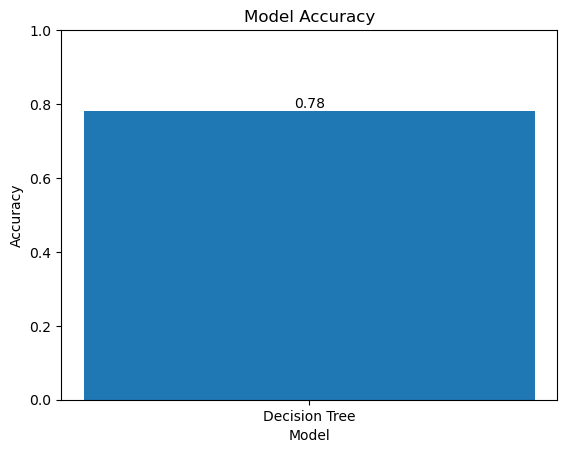

In [15]:
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy_dt = accuracy_score(ytest, dt_pred)

# Create a bar plot
plt.bar(['Decision Tree'], [accuracy_dt])

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Set the y-axis range
plt.ylim([0, 1])

# Display the accuracy value on top of each bar
for i, v in enumerate([accuracy_dt]):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Display the plot
plt.show()


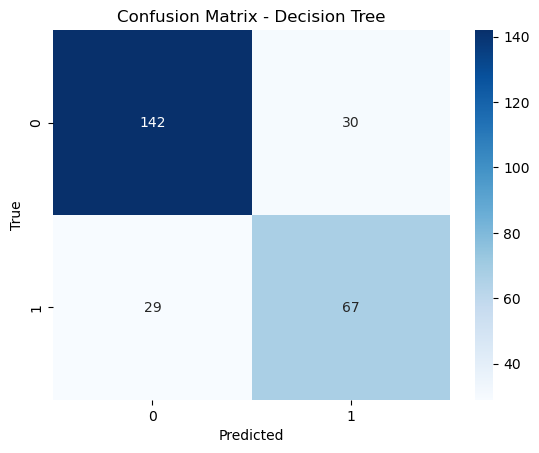

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(ytest, dt_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set plot labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')

# Display the plot
plt.show()
